## Exploratory data analysis 

### 1. Univariate analysis - and Packages / read data 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
data.shape

(1030, 9)

In [5]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

### Since these values are continuous for all fields, we will not get the value counts since it would not be helpful.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1336a9bd0>,
      dtype=object)

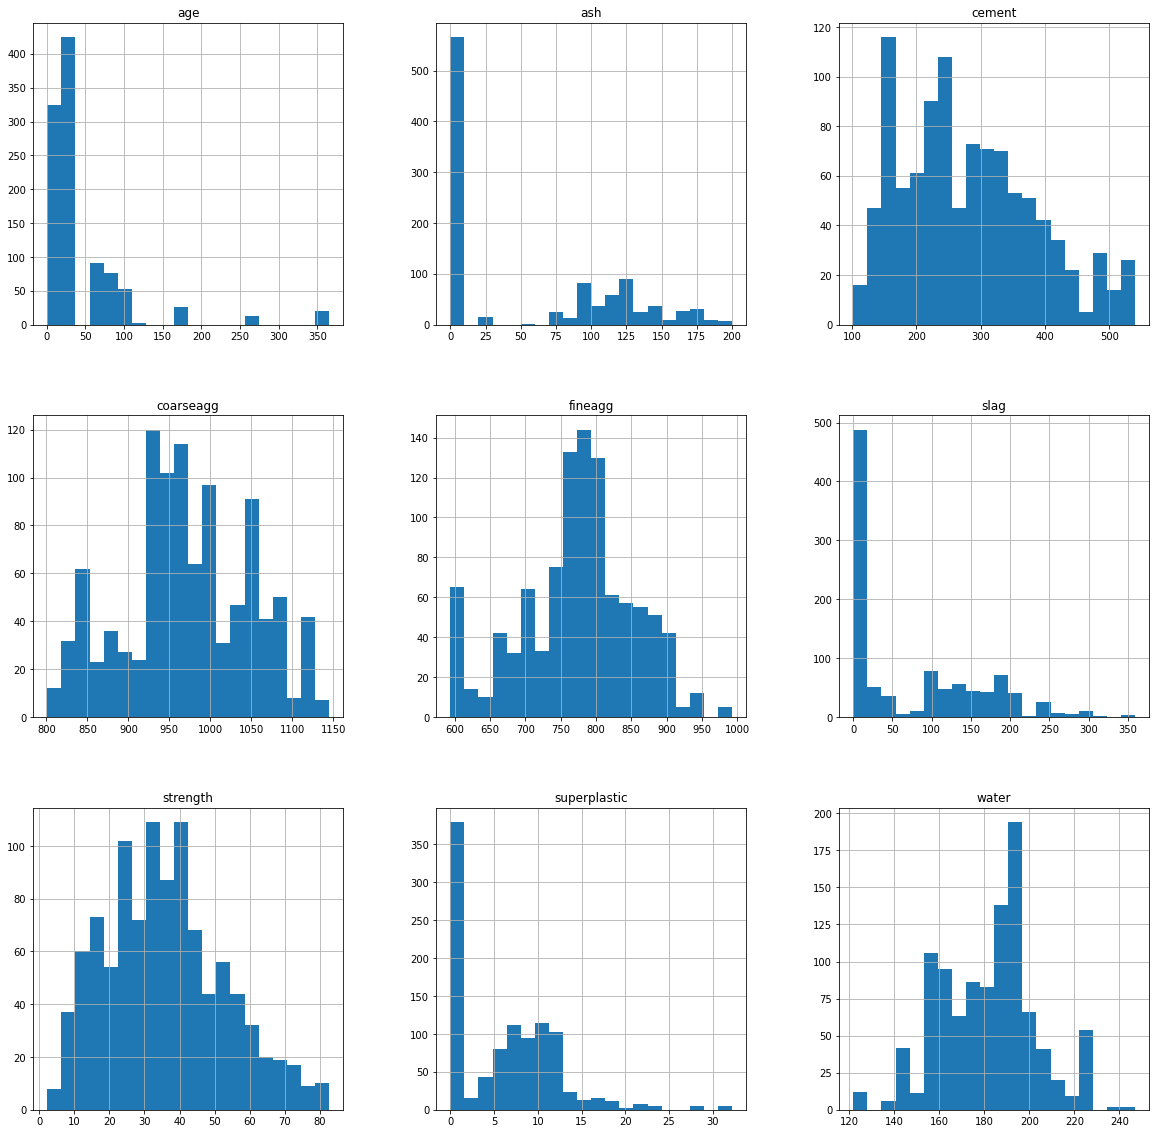

In [9]:
data.hist( figsize=[20,20], bins=20)

### From the graphs above for histogram and below for boxplot, we can tell there are some outliers and uneven distributions of values across some fo the fields. 

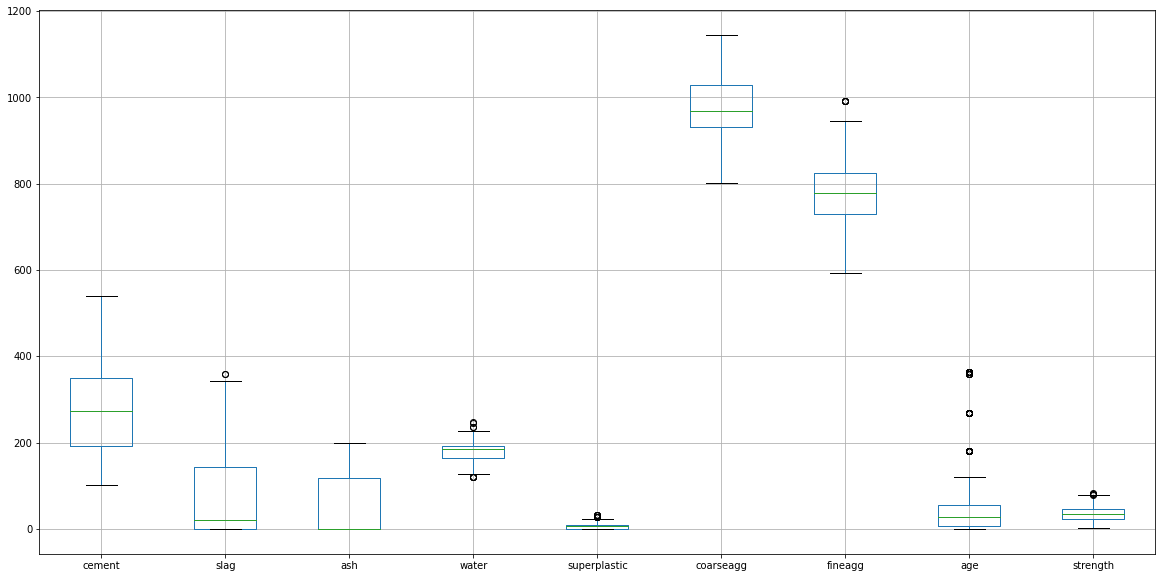

In [13]:
plt.figure(figsize=(20,10))
data.boxplot()

### 2. Bivariate analysis 

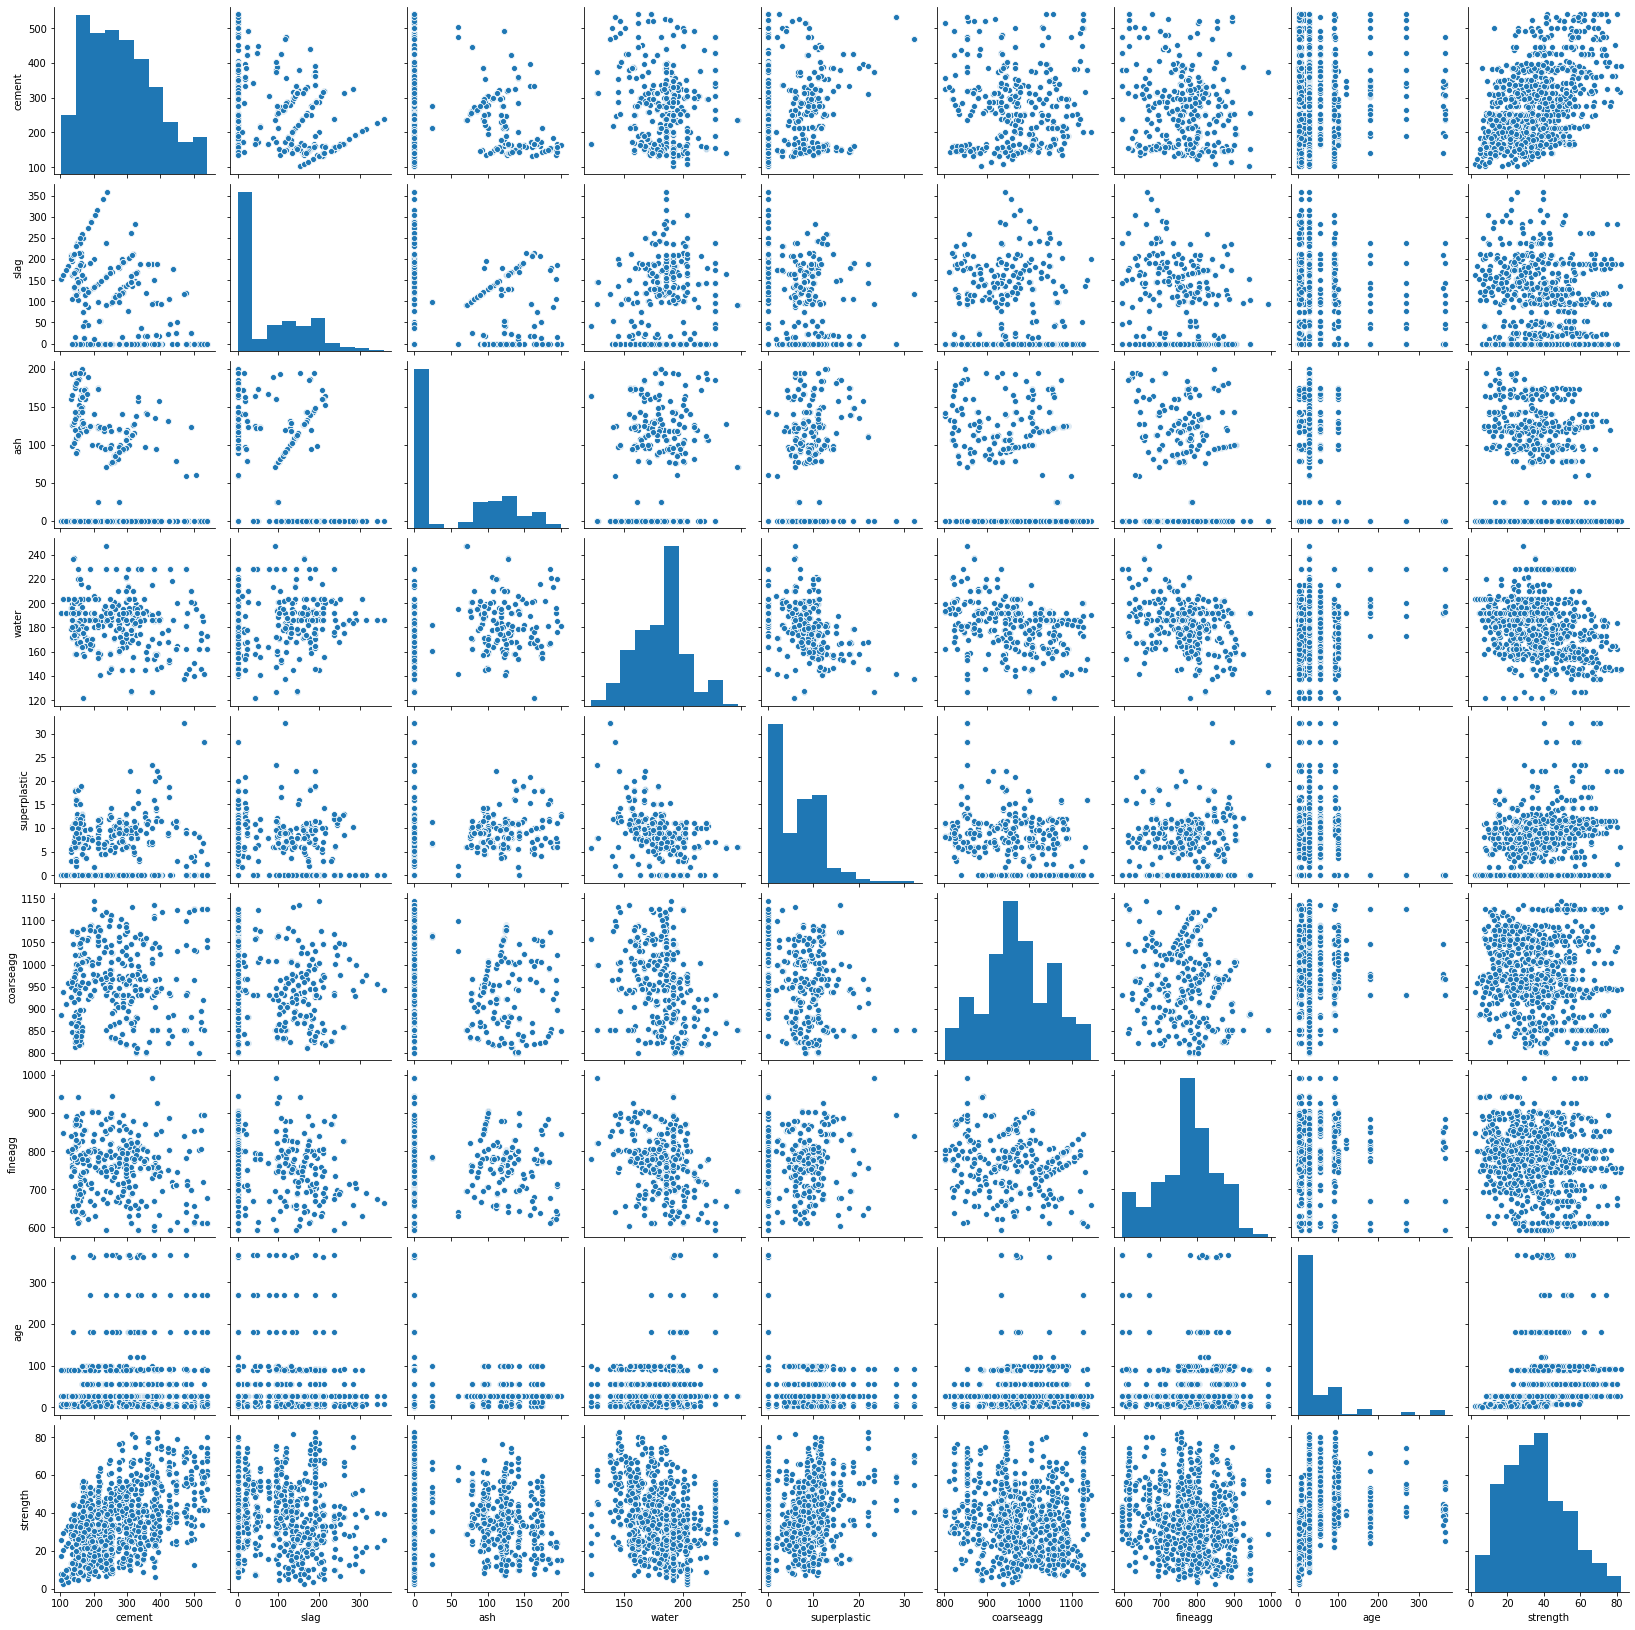

In [14]:
sns.pairplot(data)

In [16]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### From the bivariate plots above and the correlation matrix, there do not seem to be any strong positive or negative correlations in the data. 

### 3. Feature Engineering and prep for model 

In [69]:
from scipy import stats

data_no_outliers = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data_no_outliers.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [70]:
data_no_outliers.shape

(981, 9)

### Note: removing the current outliers will result in new outliers showing up in the next time we plot the data. Below is an exmaple of the new outliers given after we remove the initial ones. 

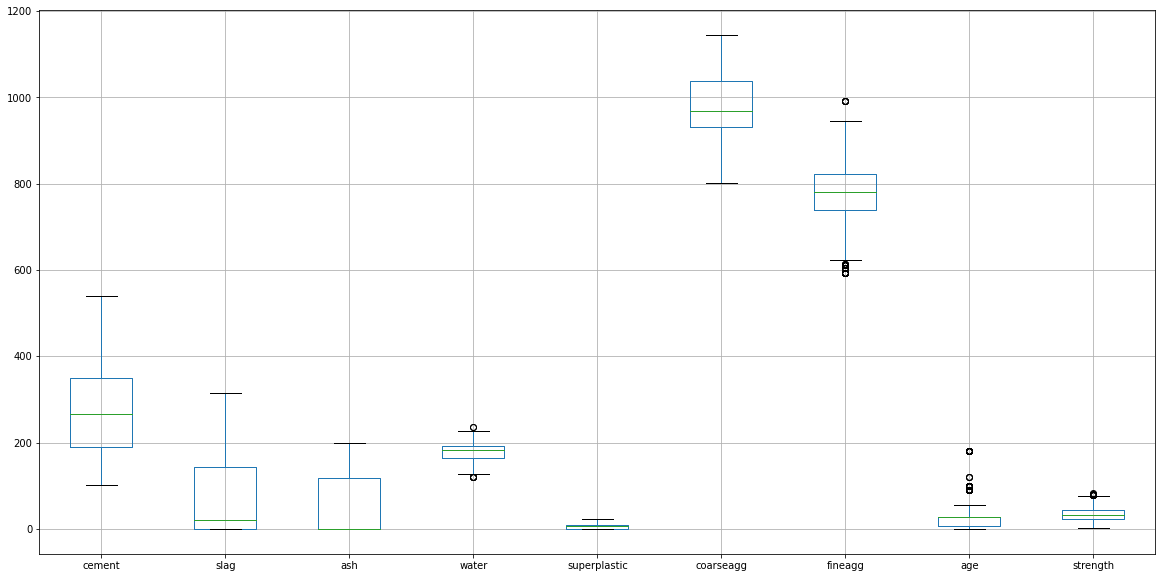

In [71]:
plt.figure(figsize=(20,10))
data_no_outliers.boxplot()

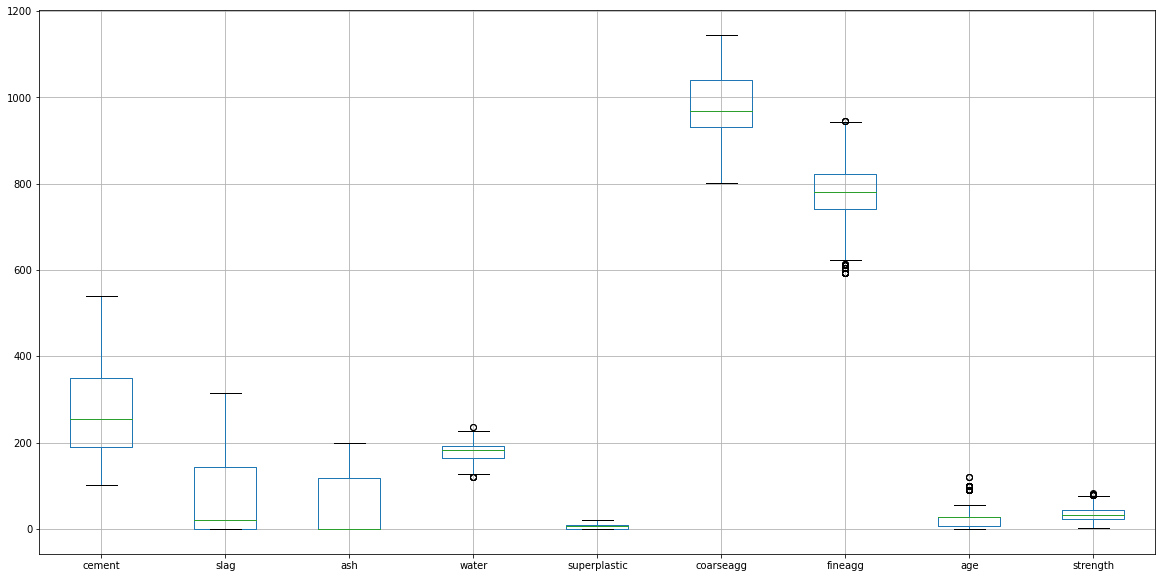

In [77]:
data_no_outliers2 = data_no_outliers[(np.abs(stats.zscore(data_no_outliers)) < 3).all(axis=1)]
# data_no_outliers2.head()
plt.figure(figsize=(20,10))
data_no_outliers2.boxplot()

In [78]:
from sklearn.model_selection import train_test_split

X = data_no_outliers2.drop(["strength"], axis=1)
Y = data_no_outliers2["strength"]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

### Something important to note that I did here. I dropped outliers twice. Once I dropped fromt he original set of data and then I decided again to drop new outliers in oder to condense the data a bit more and get rid of these values which were not considered extreme but are now considered extreme new outliers. 

Below now lets look at a simple Linear Regression model to see how it does.

In [79]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.7649187810699134

In [80]:
regression_model.score(X_test, y_test)

0.7560909340757782

In [87]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=8)), ('clf', LinearRegression())]) 
# pipe_lr.fit(X_train, y_train) 
# print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

param_grid = {'pca__n_components':[4,5,6,7,8]} 

grid = GridSearchCV( pipe_lr , param_grid = param_grid, cv = 10) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))
print("Best score: ", grid.best_score_)

 Best cross-validation accuracy: 0.75
 Best parameters:  {'pca__n_components': 8}
 Test set accuracy: 0.76
Best score:  0.7523655700753803


### Ok now lets see what we get with KFold validation technique 

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold, scoring ='r2')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.32395763 0.7880729  0.3654622  0.80928026 0.82266907 0.78239757
 0.78064226 0.69504491 0.89056835 0.72286623 0.72789988 0.91441603
 0.77424276 0.71194772 0.74399081 0.54232389 0.39203391 0.77710683
 0.71305142 0.86736877 0.77765785 0.77032738 0.73879095 0.75547345
 0.4182779  0.71601972 0.77018565 0.77662897 0.79222089 0.8012188
 0.65279168 0.90023841 0.84279143 0.8220727  0.72384517 0.7809756
 0.7150723  0.70407538 0.37376954 0.78235886 0.67612173 0.42364052
 0.84596932 0.6422966  0.66365188 0.80599746 0.77572298 0.65853065
 0.79294642 0.69218033]
Accuracy: 71.474% (14.062%)


### Below is using a RandomForestRegressor with KFold

In [135]:
from sklearn.ensemble import RandomForestRegressor

num_folds = 15
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = RandomForestRegressor()
results = cross_val_score(model, X, Y, cv=kfold, scoring ='r2')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.84259696 0.88820567 0.8871331  0.96679036 0.8895495  0.93644858
 0.93701307 0.86208429 0.93742184 0.92874079 0.92310049 0.89707203
 0.93038904 0.93499025 0.94117231]
Accuracy: 91.351% (3.284%)


### Below is the model with Kfold and DecisionTreeRegressor

When num_folds is set to about 15 it was getting the best results. Above that and accuracy decreased and too far below 15 accuracy also decreased. 

In [134]:

from sklearn.tree import DecisionTreeRegressor

num_folds = 15
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = DecisionTreeRegressor()
results = cross_val_score(model, X, Y, cv=kfold, scoring ='r2')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.71363483 0.78212122 0.91211127 0.94730261 0.83180725 0.85734741
 0.91654513 0.85193935 0.79399792 0.85010427 0.90500503 0.84852772
 0.87126076 0.88559057 0.89677773]
Accuracy: 85.760% (5.805%)


### Below if BaggingRegressor and kfold

Past 30 num_folds, I did not notice any more increase in accuracy

In [133]:
from sklearn.ensemble import BaggingRegressor

num_folds = 30 
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = BaggingRegressor()
results = cross_val_score(model, X, Y, cv=kfold, scoring ='r2')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86836577 0.77351879 0.86544801 0.87650331 0.91263612 0.89875465
 0.96837658 0.96052697 0.9146495  0.8522908  0.91280604 0.92582205
 0.92267516 0.93888446 0.80103508 0.91326697 0.92027639 0.94326146
 0.90794348 0.92605591 0.90967604 0.90737808 0.9045601  0.87909852
 0.90997241 0.95908623 0.9023668  0.90205043 0.92279298 0.89674611]
Accuracy: 90.323% (4.083%)


### Below is the AdaBoostRegressor and kfold 

Increasing folds made accuracy worse so 20 was a decent number to maximize accuracy

In [132]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_validate

num_folds = 20 
seed = 7


dTree = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
model = AdaBoostRegressor(base_estimator= dTree, n_estimators=10)
results = cross_val_score(model, X, Y, cv=kfold, scoring ='r2')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.8829888  0.76792618 0.84890389 0.86012609 0.94529586 0.93674633
 0.87785828 0.93306674 0.95455016 0.84675037 0.95125296 0.91820858
 0.86080207 0.9408127  0.89765358 0.86409948 0.8711097  0.92784576
 0.9067737  0.94205107]
Accuracy: 89.674% (4.658%)


### And finally, use GridSearchCV to test DecisionTreeRegressor with different max_depths. 

In [142]:
# pipe_dt = Pipeline([('dtr', DecisionTreeRegressor())]) 

param_grid = {'max_depth':[1,2,3,4,5,6,7,8]} 

grid = GridSearchCV( DecisionTreeRegressor(random_state=0), param_grid = param_grid, cv = 10) 

grid.fit( X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.78
 Best parameters:  {'max_depth': 8}
 Test set accuracy: 0.84
